In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score

# Carregar os dados
file_path_normal = r'C:\Users\Andre\Downloads\DOUTORADO\focusnormais.xlsx'  # Substitua pelo caminho correto
file_path_anomalous = r'C:\Users\Andre\Downloads\DOUTORADO\focusanomalos5.xlsx'  # Substitua pelo caminho correto

# Carregar os dados normais e anômalos
normais = pd.read_excel(file_path_normal)
anomalos = pd.read_excel(file_path_anomalous)

normais = normais.to_numpy()
anomalos = anomalos.to_numpy()

# Pré-processamento de dados
scaler = StandardScaler()

# Ajustar o scaler nos dados normais (apenas treino usa fit_transform)
normais_scaled = scaler.fit_transform(normais)

# Transformar os dados anômalos para o mesmo espaço
anomalos_scaled = scaler.transform(anomalos)

# Concatenar os dados normais e anômalos para treinar o modelo
X = np.concatenate([normais_scaled, anomalos_scaled], axis=0)

# Labels: 0 para normais e 1 para anômalos
y = np.concatenate([np.zeros(len(normais)), np.ones(len(anomalos))])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (anomalos)


[[ 2.66666660e+01 -7.81250000e-01  2.34375000e+00 ...  8.29000000e+02
   4.70000000e+01  6.90000000e+01]
 [ 5.68627434e+01 -4.68750000e+00 -1.56250000e+00 ...  7.45000000e+02
   4.70000000e+01  6.90000000e+01]
 [ 7.01960754e+01 -5.46875000e+00  7.81250000e-01 ...  1.20700000e+03
   4.70000000e+01  7.00000000e+01]
 ...
 [ 0.00000000e+00  0.00000000e+00 -3.12500000e+00 ...  0.00000000e+00
   5.80000000e+01  1.02000000e+02]
 [ 0.00000000e+00  0.00000000e+00 -3.12500000e+00 ...  0.00000000e+00
   5.80000000e+01  1.02000000e+02]
 [ 0.00000000e+00  0.00000000e+00 -3.12500000e+00 ...  0.00000000e+00
   5.80000000e+01  1.03000000e+02]]


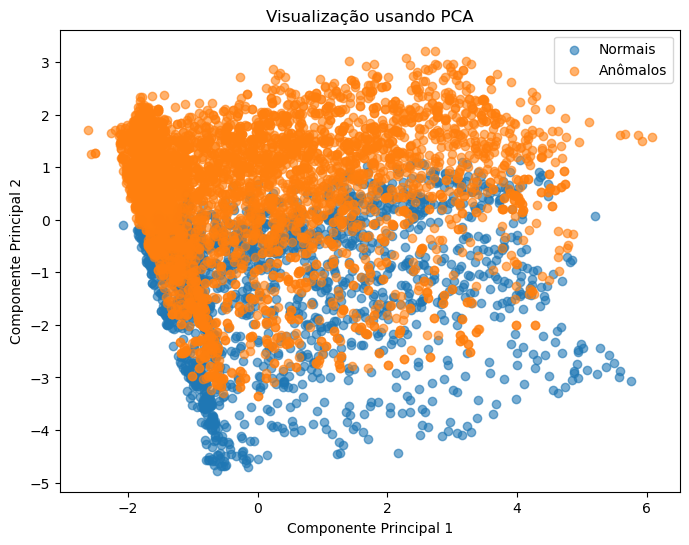

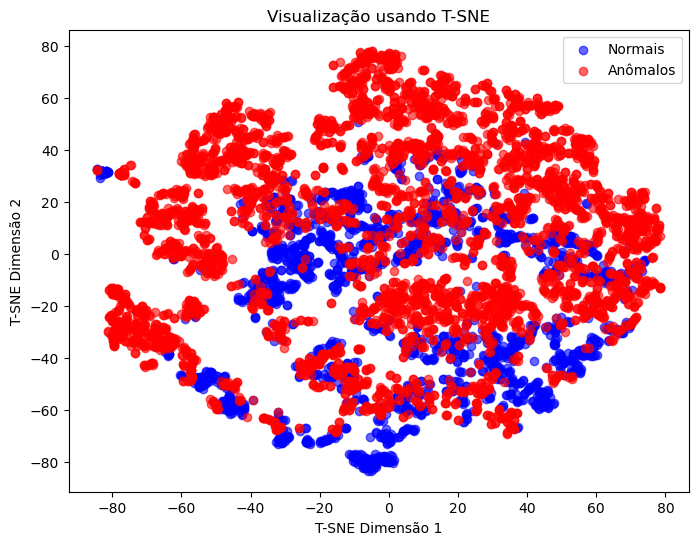

Componente 1: Variância Explicada = 0.3055, Variância Cumulativa = 0.3055
Componente 2: Variância Explicada = 0.2292, Variância Cumulativa = 0.5348
Componente 3: Variância Explicada = 0.1563, Variância Cumulativa = 0.6911
Componente 4: Variância Explicada = 0.0934, Variância Cumulativa = 0.7845
Componente 5: Variância Explicada = 0.0775, Variância Cumulativa = 0.8620
Componente 6: Variância Explicada = 0.0358, Variância Cumulativa = 0.8978
Componente 7: Variância Explicada = 0.0330, Variância Cumulativa = 0.9308
Componente 8: Variância Explicada = 0.0297, Variância Cumulativa = 0.9605
Componente 9: Variância Explicada = 0.0255, Variância Cumulativa = 0.9860
Componente 10: Variância Explicada = 0.0140, Variância Cumulativa = 1.0000


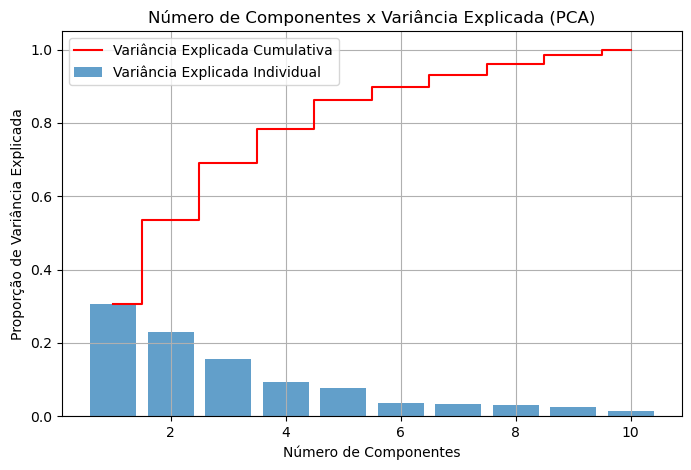

Variância explicada por cada componente: [0.30551446 0.22924418 0.15634597 0.09336669 0.07753503 0.03583958
 0.03296221 0.02970482 0.02550021 0.01398685]
Variância explicada cumulativa: [0.30551446 0.53475864 0.69110462 0.78447131 0.86200634 0.89784591
 0.93080812 0.96051293 0.98601315 1.        ]
Número total de componentes calculados: 10


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Aplicar PCA para reduzir para 2 dimensões
pca = PCA()
X_pca = pca.fit_transform(X)



# Visualizar os dados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Normais', alpha=0.6)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Anômalos', alpha=0.6)
plt.title('Visualização usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


# Aplicar T-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualizar os dados no espaço 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], label='Normais', alpha=0.6, c='blue')
plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], label='Anômalos', alpha=0.6, c='red')
plt.title('Visualização usando T-SNE')
plt.xlabel('T-SNE Dimensão 1')
plt.ylabel('T-SNE Dimensão 2')
plt.legend()
plt.show()

# Variância explicada por cada componente
variancia_explicada = pca.explained_variance_ratio_

# Variância explicada cumulativa
variancia_explicada_cumulativa = np.cumsum(variancia_explicada)

# Exibir resultados
for i, (var, cum_var) in enumerate(zip(variancia_explicada, variancia_explicada_cumulativa), 1):
    print(f"Componente {i}: Variância Explicada = {var:.4f}, Variância Cumulativa = {cum_var:.4f}")
    
# Número de componentes
num_componentes = np.arange(1, len(variancia_explicada) + 1)

# Plotar variância explicada
plt.figure(figsize=(8, 5))
plt.bar(num_componentes, variancia_explicada, alpha=0.7, label='Variância Explicada Individual')
plt.step(num_componentes, variancia_explicada_cumulativa, where='mid', color='red', label='Variância Explicada Cumulativa')
plt.xlabel('Número de Componentes')
plt.ylabel('Proporção de Variância Explicada')
plt.title('Número de Componentes x Variância Explicada (PCA)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print("Variância explicada por cada componente:", variancia_explicada)
print("Variância explicada cumulativa:", variancia_explicada_cumulativa)
print("Número total de componentes calculados:", len(variancia_explicada))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # Para visualização em 3D
from sklearn.manifold import TSNE
import matplotlib
matplotlib.use('TkAgg')

plt.ion()

# Ajustar PCA para 3 componentes principais
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)



# Visualizar os dados em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], X_pca[y == 0, 2], label='Normais', alpha=0.6, c='blue')
ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], X_pca[y == 1, 2], label='Anômalos', alpha=0.6, c='red')
ax.set_title('Visualização usando PCA (3 Componentes)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.legend()

# Ajustar visualização inicial
ax.view_init(elev=30, azim=45)  # Rotação inicial (opcional)

plt.show()  # Mostra o gráfico interativo




In [4]:
# Aplicar T-SNE com 3 dimensões
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualizar os dados no espaço 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], X_tsne[y == 0, 2], label='Normais', alpha=0.6, c='blue')
ax.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], X_tsne[y == 1, 2], label='Anômalos', alpha=0.6, c='red')
ax.set_title('Visualização usando T-SNE (3 Dimensões)')
ax.set_xlabel('T-SNE Dimensão 1')
ax.set_ylabel('T-SNE Dimensão 2')
ax.set_zlabel('T-SNE Dimensão 3')
ax.legend()
plt.show()

# Ajustar visualização inicial
ax.view_init(elev=30, azim=45)  # Rotação inicial (opcional)

plt.show()  # Mostra o gráfico interativo

In [ ]:
#Criando o Autoencoder
autoencoder = Sequential()

# Camada de codificação
autoencoder.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # 64 neurônios
autoencoder.add(Dense(32, activation='relu'))  # 32 neurônios

# Camada de codificação intermediária
autoencoder.add(Dense(16, activation='relu'))  # 16 neurônios

# Camada de decodificação
autoencoder.add(Dense(32, activation='relu'))
autoencoder.add(Dense(64, activation='relu'))

# Camada de saída (mesmo número de features dos dados)
autoencoder.add(Dense(X_train.shape[1], activation='sigmoid'))

# Compilar o modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Treinar o modelo
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# 4. Fazendo a detecção de anomalias
# Obter a reconstrução dos dados de teste
X_test_reconstructed = autoencoder.predict(X_test)

# Calcular o erro de reconstrução (diferença entre o original e a reconstrução)
reconstruction_error = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)

# Usar um limiar para classificar as anomalias
threshold = np.percentile(reconstruction_error, 95)  # Definir limiar como 95% do erro

# Classificar como anômalo se o erro de reconstrução for maior que o limiar
y_pred = (reconstruction_error > threshold).astype(int)



In [ ]:
# Visualizar o erro de reconstrução para anômalos e normais
plt.hist(reconstruction_error, bins=50, color='gray', alpha=0.7, label="Erro de reconstrução (Normais)")
plt.axvline(x=threshold, color='red', linestyle='--', label="Limiar")
plt.legend()
plt.title("Erro de Reconstrução (Normais)")
plt.xlabel("Erro de Reconstrução")
plt.ylabel("Frequência")
plt.show()

plt.hist(reconstruction_error_anomalous, bins=50, color='red', alpha=0.7, label="Erro de reconstrução (Anômalos)")
plt.axvline(x=threshold, color='blue', linestyle='--', label="Limiar")
plt.legend()
plt.title("Erro de Reconstrução (Anômalos)")
plt.xlabel("Erro de Reconstrução")
plt.ylabel("Frequência")
plt.show()

# Exibir as quantidades de anomalias detectadas
print(f"Número de anomalias detectadas nos dados normais: {np.sum(y_pred_test)}")
print(f"Número de anomalias detectadas nos dados anômalos: {np.sum(y_pred_anomalous)}")

# Calcular o erro de reconstrução para os dados normais e anômalos
reconstruction_error = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)
reconstruction_error_anomalous = np.mean(np.power(anomalos_scaled - autoencoder.predict(anomalos_scaled), 2), axis=1)

# Definir o limiar com base no erro de reconstrução
threshold = np.percentile(reconstruction_error, 95)  # Ajuste o limiar conforme necessário

# Classificar como anômalo se o erro de reconstrução for maior que o limiar
y_pred_test = (reconstruction_error > threshold).astype(int)
y_pred_anomalous = (reconstruction_error_anomalous > threshold).astype(int)

# Contar quantas amostras foram detectadas como anômalas nos dados normais e anômalos
print(f"Número de anomalias detectadas nos dados normais: {np.sum(y_pred_test)}")
print(f"Número de anomalias detectadas nos dados anômalos: {np.sum(y_pred_anomalous)}")


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Inicializar o modelo Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)

# Treinar o modelo
model.fit(X_pca)

# Prever as anomalias
y_pred = model.predict(X_pca)  # 1 para anômalos, -1 para normais
y_true = y  # Certifique-se de que y está definido corretamente

# Ajustar as previsões para o formato dos rótulos verdadeiros
y_pred_adjusted = np.where(y_pred == -1, 0, 1)

# Visualizar os resultados
plt.figure(figsize=(8, 6))

# Rótulos verdadeiros (Normais)
plt.scatter(X_pca[(y_true == 0) & (y_pred_adjusted == 0), 0], 
            X_pca[(y_true == 0) & (y_pred_adjusted == 0), 1],
            label='Normais (Correto)', alpha=0.6, c='blue')

# Falsos negativos
plt.scatter(X_pca[(y_true == 0) & (y_pred_adjusted == 1), 0], 
            X_pca[(y_true == 0) & (y_pred_adjusted == 1), 1],
            label='Normais (Errado)', alpha=0.6, c='orange')

# Rótulos verdadeiros (Anômalos)
plt.scatter(X_pca[(y_true == 1) & (y_pred_adjusted == 1), 0], 
            X_pca[(y_true == 1) & (y_pred_adjusted == 1), 1],
            label='Anômalos (Correto)', alpha=0.6, c='red')

# Falsos positivos
plt.scatter(X_pca[(y_true == 1) & (y_pred_adjusted == 0), 0], 
            X_pca[(y_true == 1) & (y_pred_adjusted == 0), 1],
            label='Anômalos (Errado)', alpha=0.6, c='green')

plt.title('Comparação de Previsões e Rótulos Verdadeiros')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred_adjusted, target_names=["Normal", "Anômalo"]))

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Treinamento com ajuste de contaminação
model = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)
model.fit(X_scaled)

# Previsões
y_pred = model.predict(X_scaled)
y_pred_adjusted = np.where(y_pred == -1, 0, 1)

# Avaliação
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred_adjusted, target_names=["Normal", "Anômalo"]))

# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Obter os centróides e os rótulos dos clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calcular a distância de cada ponto ao seu centróide
distances = np.linalg.norm(X_pca-centroids[labels], axis=1)

# Definir um limiar para detectar anomalias (percentil 95)
threshold = np.percentile(distances, 95)
anomalies = distances > threshold
y_pred = anomalies.astype(int)
y_true = y


plt.figure(figsize=(8, 6))

# Rótulos verdadeiros (Normais)
plt.scatter(X_pca[(y == 0) & (y_pred == 1), 0], X_pca[(y == 0) & (y_pred == 1), 1],
            label='Normais (Correto)', alpha=0.6, c='blue')

# Falsos negativos
plt.scatter(X_pca[(y == 0) & (y_pred == -1), 0], X_pca[(y == 0) & (y_pred == -1), 1],
            label='Normais (Errado)', alpha=0.6, c='orange')

# Rótulos verdadeiros (Anômalos)
plt.scatter(X_pca[(y == 1) & (y_pred == -1), 0], X_pca[(y == 1) & (y_pred == -1), 1],
            label='Anômalos (Correto)', alpha=0.6, c='red')

# Falsos positivos
plt.scatter(X_pca[(y == 1) & (y_pred == 1), 0], X_pca[(y == 1) & (y_pred == 1), 1],
            label='Anômalos (Errado)', alpha=0.6, c='green')

plt.title('Comparação de Previsões e Rótulos Verdadeiros')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



print("Relatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Anômalo"]))

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar os dados pela classe verdadeira
X_normal = X_scaled[y == 0]  # Classe Normal (rótulo 0)
X_anomaly = X_scaled[y == 1]  # Classe Anômalo (rótulo 1)

# Superamostrar a classe Normal para igualar o tamanho da classe Anômalo
X_normal_resampled = resample(X_normal, 
                              replace=True,  # Permitir duplicação de dados
                              n_samples=len(X_anomaly),  # Igualar ao número de anômalos
                              random_state=42)

# Combinar as classes balanceadas
X_balanced = np.vstack([X_normal_resampled, X_anomaly])
y_balanced = np.hstack([np.zeros(len(X_normal_resampled)), np.ones(len(X_anomaly))])

# Treinar o modelo Isolation Forest no conjunto balanceado
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_balanced)

# Fazer previsões no conjunto original
y_pred = model.predict(X_scaled)

# Ajustar rótulos: -1 para 0 (Anômalo), 1 para 1 (Normal)
y_pred_adjusted = np.where(y_pred == -1, 0, 1)

# Avaliação
print("Relatório de Classificação:")
print(classification_report(y, y_pred_adjusted, target_names=["Normal", "Anômalo"]))

# Matriz de Confusão
cm = confusion_matrix(y, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão após Balanceamento')
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Inicializar o modelo Isolation Forest
model = IsolationForest(contamination=0.5, random_state=42)

# Treinar o modelo
model.fit(X_tsne)

# Prever as anomalias
y_pred = model.predict(X_tsne)  # 1 para anômalos, -1 para normais
y_true = y  # Certifique-se de que y está definido corretamente

# Ajustar as previsões para o formato dos rótulos verdadeiros
y_pred_adjusted = np.where(y_pred == -1, 0, 1)

# Visualizar os resultados
plt.figure(figsize=(8, 6))

# Rótulos verdadeiros (Normais)
plt.scatter(X_tsne[(y_true == 0) & (y_pred_adjusted == 0), 0], 
            X_tsne[(y_true == 0) & (y_pred_adjusted == 0), 1],
            label='Normais (Correto)', alpha=0.6, c='blue')

# Falsos negativos
plt.scatter(X_tsne[(y_true == 0) & (y_pred_adjusted == 1), 0], 
            X_tsne[(y_true == 0) & (y_pred_adjusted == 1), 1],
            label='Normais (Errado)', alpha=0.6, c='orange')

# Rótulos verdadeiros (Anômalos)
plt.scatter(X_tsne[(y_true == 1) & (y_pred_adjusted == 1), 0], 
            X_tsne[(y_true == 1) & (y_pred_adjusted == 1), 1],
            label='Anômalos (Correto)', alpha=0.6, c='red')

# Falsos positivos
plt.scatter(X_tsne[(y_true == 1) & (y_pred_adjusted == 0), 0], 
            X_tsne[(y_true == 1) & (y_pred_adjusted == 0), 1],
            label='Anômalos (Errado)', alpha=0.6, c='green')

plt.title('Comparação de Previsões e Rótulos Verdadeiros')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred_adjusted, target_names=["Normal", "Anômalo"]))

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Inicializar o modelo One-Class SVM
# O parâmetro nu controla a fração esperada de anomalias (entre 0 e 1)
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)  # Ajuste gamma e nu conforme necessário

# Treinar o modelo
ocsvm.fit(X_pca)

# Prever as anomalias: -1 = anômalos, 1 = normais
y_pred = ocsvm.predict(X_pca)

# Ajustar os valores de y_pred para comparação com y_true
y_pred_adjusted = np.where(y_pred == 1, 0, 1)  # 0 = normais, 1 = anômalos

# Comparar com os rótulos verdadeiros (y_true)
print("Relatório de Classificação:")
print(classification_report(y, y_pred_adjusted, target_names=["Normal", "Anômalo"]))

# Matriz de confusão
cm = confusion_matrix(y, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()

# Visualização dos resultados
plt.figure(figsize=(8, 6))

# Pontos normais (corretos)
plt.scatter(X_pca[(y == 0) & (y_pred_adjusted == 0), 0], X_pca[(y == 0) & (y_pred_adjusted == 0), 1],
            label='Normais (Correto)', alpha=0.6, c='blue')

# Falsos negativos (normais previstos como anômalos)
plt.scatter(X_pca[(y == 0) & (y_pred_adjusted == 1), 0], X_pca[(y == 0) & (y_pred_adjusted == 1), 1],
            label='Normais (Errado)', alpha=0.6, c='orange')

# Pontos anômalos (corretos)
plt.scatter(X_pca[(y == 1) & (y_pred_adjusted == 1), 0], X_pca[(y == 1) & (y_pred_adjusted == 1), 1],
            label='Anômalos (Correto)', alpha=0.6, c='red')

# Falsos positivos (anômalos previstos como normais)
plt.scatter(X_pca[(y == 1) & (y_pred_adjusted == 0), 0], X_pca[(y == 1) & (y_pred_adjusted == 0), 1],
            label='Anômalos (Errado)', alpha=0.6, c='green')

plt.title('Detecção de Anomalias usando One-Class SVM')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()
